<a href="https://colab.research.google.com/github/jiruneko/voice-recognition/blob/main/voice_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import wave as wave

In [ ]:
!pip install pyroomacoustics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.1/35.1 MB 38.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for pyroomacoustics: filename=pyroomacoustics-0.8.1-cp310-cp310-linux_x86_64.whl size=13011405 sha256=e9c8be01504ff0748f96391571ee814d1dd888f0dd4f10a3dceae0c0956b6554
  Stored in directory: /root/.cache/pip/wheels/66/79/63/91661daa0efa6d62c810cd3efe132f53db9f936763feb028b4
Successfully built pyroomacoustics


In [ ]:
import pyroomacoustics as pa

In [ ]:
import numpy as np

In [ ]:
pa.datasets.CMUArcticCorpus(basedir="./CMU_ARCTIC", download=True,speaker=["aew", "axb"])

Download http://festvox.org/cmu_arctic/packed/cmu_us_aew_arctic.tar.bz2 into ./CMU_ARCTIC ...
Download http://festvox.org/cmu_arctic/packed/cmu_us_axb_arctic.tar.bz2 into ./CMU_ARCTIC ...


In [ ]:
sample_wave_file="./CMU_ARCTIC/cmu_us_aew_arctic/wav/arctic_a0001.wav"

In [ ]:
wav=wave.open(sample_wave_file)

In [ ]:
print("サンプリング周波数[Hz]: ",wav.getframerate())
print("サンプルサイズ[Byte]: ", wav.getsampwidth())
print("サンプル数: ",wav.getnframes())
print("チャンネル数: ",wav.getnchannels())

サンプリング周波数[Hz]:  16000
サンプルサイズ[Byte]:  2
サンプル数:  62081
チャンネル数:  1


In [ ]:
data=wav.readframes(wav.getnframes())

In [ ]:
data=np.frombuffer(data, dtype=np.int16)

In [ ]:
wav.close()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data=data/np.iinfo(np.int16).max
x=np.array(range(wav.getnframes()))/wav.getframerate()

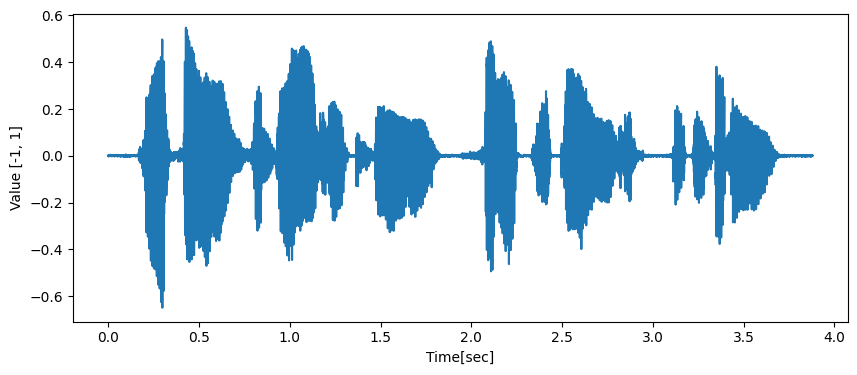

In [ ]:
plt.figure(figsize=(10,4))
plt.xlabel("Time[sec]")
plt.ylabel("Value [-1, 1]")
plt.plot(x,data)
plt.savefig("./wave_form.png")
plt.show()

In [ ]:
n_sample=40000
sample_rate=16000
np.random.seed(0)
data=np.random.normal(size=n_sample)

In [ ]:
np.random.seed(0)

In [ ]:
data=np.random.normal(scale=0.1, size=n_sample)
data_scale_adjust=data*np.iinfo(np.int16).max
data_scale_adjust=data_scale_adjust.astype(np.int16)
wave_out=wave.open("./wgn_wave.wav", "w")
wave_out.setnchannels(1)
wave_out.setsampwidth(2)
wave_out.setframerate(sample_rate)
wave_out.writeframes(data_scale_adjust)
wave_out.close()

In [ ]:
!pip install sounddevice

In [ ]:
!pip install nara-wpe

In [ ]:
!pip install libportaudio2

In [ ]:
from IPython.display import Audio
import soundfile as sf

# 音声データを一時ファイルとして保存
sf.write('output.wav', data, wav.getframerate())

# Colab で音声を再生
Audio('output.wav')